In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)
print(cancer.feature_names)
print(cancer.target_names)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [18]:
from sklearn.datasets import load_breast_cancer
cancer.data


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
list(data.target_names)

['malignant', 'benign']

In [30]:
cancer.data.shape

(569, 30)

In [33]:
import pandas as pd

raw_data = pd.read_csv('C:/Users/hp/Downloads/breast-cancer-wisconsin.csv')
raw_data.tail(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractaldimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concaveppoints_worst,symmetry_worst,fractaldimension_worst,conclude,Diagnosis,Unnamed: 32
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1,B,NaN
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1,B,NaN
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1,B,NaN
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0,M,NaN
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0,M,NaN
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0,M,NaN
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0,M,NaN
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0,M,NaN
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0,M,NaN
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1,B,NaN


In [2]:
import pandas as pd

raw_data = pd.read_csv('C:/Users/hp/Downloads/Symptom_set.csv')
raw_data.tail(10)

,Id No.,Diagnosis,Conclusion,Blood_limped_saliva,Continuoud_Diarrehea,Breast_lump_discharge,Lumps_in_testicles,Blood_in_Urine,Hoarseness,Smoking_alcohol,...,Bleeding_moles,Difficuilty_in_swallowing_solids,Non_healing_sores,Unexpected_weight_loss,Unexpected_weight_loss.1,Persistent_headache,Family_history,Chest_pain,Persistent_Fever,Unnamed: 21
86,10023,N,0,1,1,1,1,0,1,1,...,0,0,1,1,0,1,0,1,1,0
87,1005,Y,1,0,0,1,1,0,1,1,...,0,1,0,1,0,1,0,0,1,0
88,1007,N,0,1,0,1,1,0,1,1,...,1,1,0,0,1,0,1,0,1,0
89,1008,Y,1,0,0,0,1,0,1,0,...,1,1,0,1,1,1,0,1,1,0
90,10010,N,0,1,0,1,0,0,1,0,...,1,1,0,0,1,1,1,1,0,0
91,10012,N,0,0,0,0,1,1,1,0,...,0,1,1,0,1,0,0,0,0,0
92,100890,Y,1,0,0,1,1,1,1,1,...,1,1,0,1,1,0,0,1,0,1
93,10045,Y,1,0,0,0,1,1,1,0,...,1,1,1,1,1,0,0,1,0,0
94,10067,Y,1,0,0,0,1,1,1,0,...,1,0,1,1,1,0,1,1,1,1
95,100,N,0,0,0,1,1,0,1,0,...,1,1,1,0,1,0,0,0,1,1


In [3]:
!pip install mglearn

You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


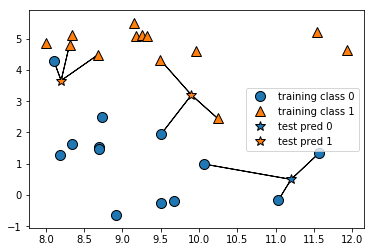

In [7]:
import mglearn 
mglearn.plots.plot_knn_classification(n_neighbors=3)


In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
print('Accuracy of KNN n-5,on the training set:{:.3f}',format(knn.score(X_train,y_train)))
print('Accuracy of KNN n-5,on the test set:{:.3f}',format(knn.score(X_test,y_test)))

Accuracy of KNN n-5,on the training set:{:.3f} 0.9460093896713615
Accuracy of KNN n-5,on the test set:{:.3f} 0.9300699300699301


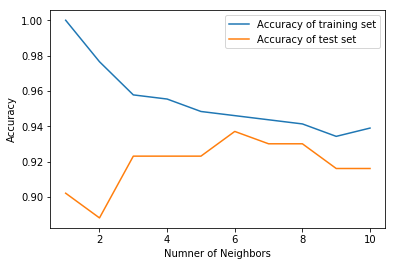

In [13]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
training_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings,training_accuracy,label='Accuracy of training set')
plt.plot(neighbors_settings,test_accuracy,label='Accuracy of test set')
plt.ylabel('Accuracy')
plt.xlabel('Numner of Neighbors')
plt.legend()


In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
print('Accuracy on the training subset:{:.3f}',format(log_reg.score(X_train,y_train)))
print('Accuracy on the test subset:{:.3f}',format(log_reg.score(X_test,y_test)))

Accuracy on the training subset:{:.3f} 0.9553990610328639
Accuracy on the test subset:{:.3f} 0.958041958041958


In [20]:
log_reg100=LogisticRegression(C=100)
log_reg100.fit(X_train,y_train)
print('Accuracy on the training subset:{:.3f}',format(log_reg100.score(X_train,y_train)))
print('Accuracy on the test subset:{:.3f}',format(log_reg100.score(X_test,y_test)))

Accuracy on the training subset:{:.3f} 0.971830985915493
Accuracy on the test subset:{:.3f} 0.965034965034965


w[0]: 0.393906  b: -0.031804


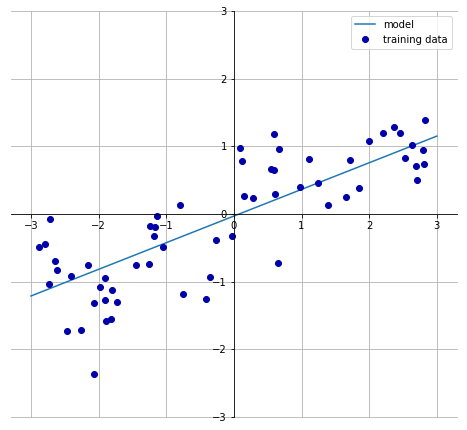

In [22]:
import mglearn
mglearn.plots.plot_linear_regression_wave()


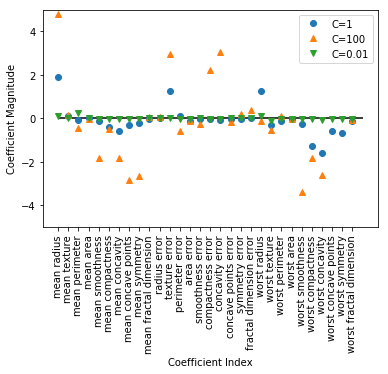

In [36]:
plt.plot(log_reg.coef_.T,'o',label='C=1')
plt.plot(log_reg100.coef_.T,'^',label='C=100')
log_reg01=LogisticRegression(C=0.01)

log_reg01.fit(X_train,y_train)
plt.plot(log_reg01.coef_.T,'v',label='C=0.01')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()


In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print('Accuracy on the training subset:{:.3f}',format(tree.score(X_train,y_train)))
print('Accuracy on the test subset:{:.3f}',format(tree.score(X_test,y_test)))

Accuracy on the training subset:{:.3f} 1.0
Accuracy on the test subset:{:.3f} 0.9370629370629371


In [74]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print('Accuracy on the training subset:{:.3f}',format(tree.score(X_train,y_train)))
print('Accuracy on the test subset:{:.3f}',format(tree.score(X_test,y_test)))

Accuracy on the training subset:{:.3f} 0.9225352112676056
Accuracy on the test subset:{:.3f} 0.9230769230769231


In [75]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='cancertree.dot',class_names=['malignant','benign'],feature_names=cancer.feature_names,impurity=False,filled=True)


![](cancertree.dot)


In [77]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "C:/Users/hp/Anaconda3/pkgs/scikit-learn-0.19.1-py36h53aea1b_0/Lib/site-packages/sklearn/cancertree.png")

In [78]:
print('Feature importances:{}',format(tree.feature_importances_))


Feature importances:{} [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [81]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


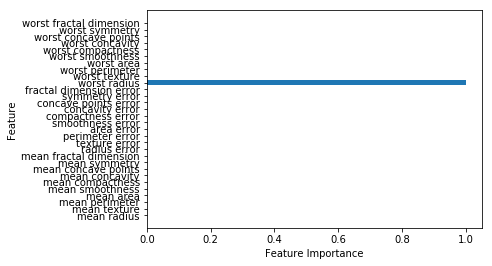

In [83]:
import numpy as np
n_features=cancer.data.shape[1]
plt.barh(range(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)
print('Accuracy on training subset: {:.3f}',format(forest.score(X_train,y_train)))

print('Accuracy on test subset: {:,3f}',format(forest.score(X_test,y_test)))    

Accuracy on training subset: {:.3f} 1.0
Accuracy on test subset: {:,3f} 0.972027972027972


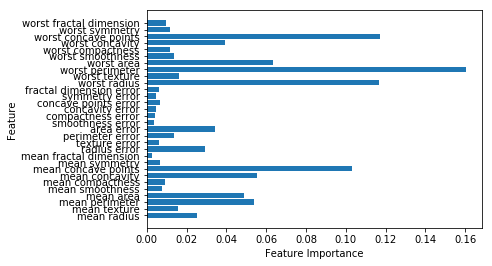

In [92]:
import numpy as np
n_features=cancer.data.shape[1]
plt.barh(range(n_features),forest.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [94]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print('Accuracy on training subset: {:.3f}',format(mlp.score(X_train,y_train)))

print('Accuracy on test subset: {:,3f}',format(mlp.score(X_test,y_test)))    

Accuracy on training subset: {:.3f} 0.9061032863849765
Accuracy on test subset: {:,3f} 0.8811188811188811


In [3]:
 from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()

print('The maximum per each feature:\n{}'.format(cancer.data.max(axis=0)))

The maximum per each feature:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

X_train_scaled=scaler.fit(X_train).transform(X_train)
X_test_scaled=scaler.fit(X_test).transform(X_test)
mlp=MLPClassifier(max_iter=1000,random_state=42)
mlp.fit(X_train_scaled,y_train)

print('Accuracy on training subset: {:.3f}',format(mlp.score(X_train_scaled,y_train)))

print('Accuracy on test subset: {:,3f}',format(mlp.score(X_test_scaled,y_test)))    

Accuracy on training subset: {:.3f} 0.9953051643192489
Accuracy on test subset: {:,3f} 0.958041958041958


In [7]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [8]:
mlp=MLPClassifier(max_iter=1000,alpha=1,random_state=42)
mlp.fit(X_train_scaled,y_train)

print('Accuracy on training subset: {:.3f}',format(mlp.score(X_train_scaled,y_train)))

print('Accuracy on test subset: {:,3f}',format(mlp.score(X_test_scaled,y_test)))    

Accuracy on training subset: {:.3f} 0.9882629107981221
Accuracy on test subset: {:,3f} 0.972027972027972


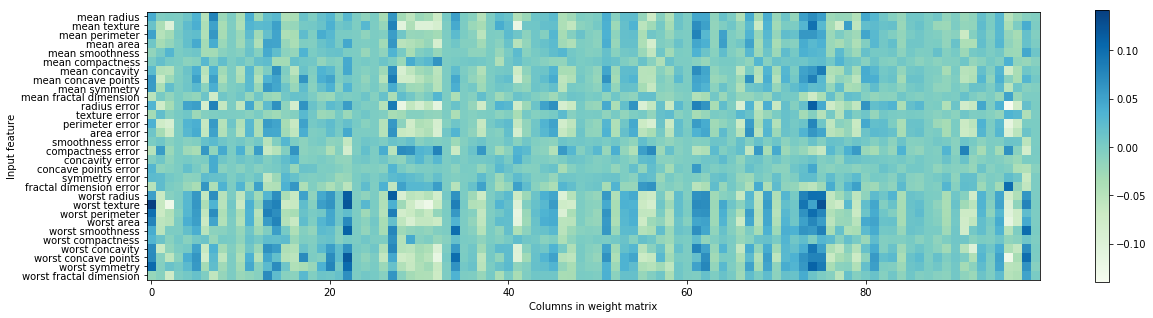

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
cancer=load_breast_cancer()

plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

In [7]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

svm=SVC()
svm.fit(X_train,y_train)


print('Accuracy on training subset: {:.3f}',format(svm.score(X_train,y_train)))

print('Accuracy on test subset: {:,3f}',format(svm.score(X_test,y_test)))    

Accuracy on training subset: {:.3f} 1.0
Accuracy on test subset: {:,3f} 0.6293706293706294


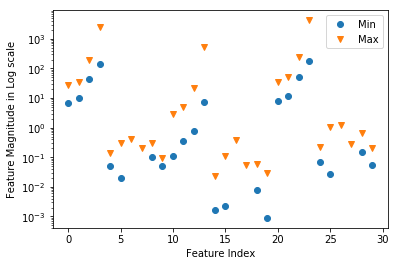

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_train.min(axis=0),'o',label='Min')
plt.plot(X_train.max(axis=0),'v',label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log scale')
plt.yscale('log')
plt.legend(loc='upper right')

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline



min_train=X_train.min(axis=0)
range_train=(X_train - min_train).max(axis=0)
X_train_scaled=(X_train-min_train)/range_train

print('minimun per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('maximun per feature\n{}'.format(X_train_scaled.min(axis=0)))


minimun per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
maximun per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [11]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

svm=SVC()
svm.fit(X_train,y_train)



min_train=X_train.min(axis=0)


X_test_scaled=(X_test - min_train)/range_train

svm=SVC()
svm.fit(X_train_scaled,y_train)




SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
print('Accuracy on training subset: {:.3f}',format(svm.score(X_train_scaled,y_train)))

print('Accuracy on test subset: {:,3f}',format(svm.score(X_test_scaled,y_test)))    


Accuracy on training subset: {:.3f} 0.9483568075117371
Accuracy on test subset: {:,3f} 0.951048951048951


In [13]:
svm=SVC(C=1000)
svm.fit(X_train_scaled,y_train)
print('Accuracy on training subset: {:.3f}',format(svm.score(X_train_scaled,y_train)))

print('Accuracy on test subset: {:,3f}',format(svm.score(X_test_scaled,y_test)))   

Accuracy on training subset: {:.3f} 0.9882629107981221
Accuracy on test subset: {:,3f} 0.972027972027972


In [14]:
print('The Desicion function is:\n\n{}'.format(svm.decision_function(X_test_scaled)[:20]))

The Desicion function is:

[ -4.85978922   1.99579027   3.72514352   2.2759514    4.90872748
   3.38738403   5.5791361    3.65809059   4.35247953   7.58641901
   1.03844859   1.83665248   6.57010973   0.18802654   0.78505785
  -3.91506363   3.36498378  -8.28312921  -7.22330097 -13.2443725 ]


In [15]:
print('Threshold decision function:\n\n{}'.format(svm.decision_function(X_test_scaled)[:20]>0))

Threshold decision function:

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False False False]


In [16]:
svm


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
svm= SVC(C=1000,probability=True)
svm.fit(X_train_scaled,y_train)
print('Predicted probabilities for the sample(malignant and benign) whether having cancer tumor chances or Not:\n\n{}'.format(svm.predict_proba(X_test_scaled[:20])))

Predicted probabilities for the sample(malignant and benign) whether having cancer tumor chances or Not:

[[9.96389127e-01 3.61087329e-03]
 [5.33681166e-02 9.46631883e-01]
 [6.57341940e-03 9.93426581e-01]
 [3.83261601e-02 9.61673840e-01]
 [6.99456605e-06 9.99993005e-01]
 [9.95683527e-03 9.90043165e-01]
 [1.32606724e-06 9.99998674e-01]
 [7.13902489e-03 9.92860975e-01]
 [3.03127320e-03 9.96968727e-01]
 [9.14252641e-09 9.99999991e-01]
 [1.55977119e-01 8.44022881e-01]
 [6.42434913e-02 9.35756509e-01]
 [1.13601500e-07 9.99999886e-01]
 [3.46717610e-01 6.53282390e-01]
 [2.02010500e-01 7.97989500e-01]
 [9.88360215e-01 1.16397850e-02]
 [1.02342670e-02 9.89765733e-01]
 [9.99948157e-01 5.18429778e-05]
 [9.99807138e-01 1.92862125e-04]
 [9.99999889e-01 1.10614335e-07]]


In [18]:
svm.predict(X_test_scaled)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [19]:
svm= SVC(C=1000,probability=True)
svm.fit(X_train_scaled,y_train)

svm.predict(X_test_scaled)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


import pandas as pd

cancer = pd.read_csv('C:/Users/hp/Downloads/Symptom_set.csv')



X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)
print('Accuracy on training subset: {:.3f}',format(forest.score(X_train,y_train)))

print('Accuracy on test subset: {:,3f}',format(forest.score(X_test,y_test)))    

AttributeError: 'DataFrame' object has no attribute 'data'